In [ ]:
# 22회귀분석 - 회귀분석 가정 진단 모델수정
# https://www.youtube.com/watch?v=sbnq3xTC1Uk&list=PLY0OaF78qqGAxKX91WuRigHpwBU0C2SB_&index=26
# 파이썬 코드 https://ysyblog.tistory.com/120

In [1]:
# ㅁ 회귀분석 가정
#  - 선형성 : 종속변수와 독립변수 간의 관계는 선형이다.
#  - 정규성 : 독립변수값에 대해 대응되는 종속변수값들의 분포는 정규분포이다.
#  - 등분산성 : 독립변수값에 대해 대응되는 종속변수값들의 분포는 모두 동일한 분산을 갖는다.

In [6]:
import pandas as pd
df = pd.read_csv('C:/adp/data/mtcars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [31]:
from statsmodels.formula.api import ols
dfy = df[['mpg']]
dfx = df[['hp', 'wt', 'disp', 'drat']]
lr = ols('mpg ~ hp + wt + disp + drat', data = df).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.70e-10
Time:                        08:32:12   Log-Likelihood:                -73.292
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      27   BIC:                             163.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1487      6.294      4.631      0.000      16.235      42.062
hp            -0.0348      0.012     -2.999      0.006      -0.059      -0.011
wt            -3.4797      1.078     -3.227      0.003      -5.692      -1.267
disp           0.0038      0.011      0.353      0.727      -0.018       0.026
drat           1.7680      1.320      1.340      0.192      -0.940       4.476
==============================================================================
Omnibus:                        5.267   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.327
Skew:                           0.899   Prob(JB):                        0.115
Kurtosis:                       3.102   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
## 오차의 정규성 or 모형의 선형성
# 예측값(fitted)과 잔차(residual)를 비교
# 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 한다.
# 빨간 실선은 잔차의 추세를 나타낸다.
# 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것으로 선형성이 없다는 것이다.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = lr.predict(x)
fitted = lr.predict(df)
residual = df['mpg'] - fitted

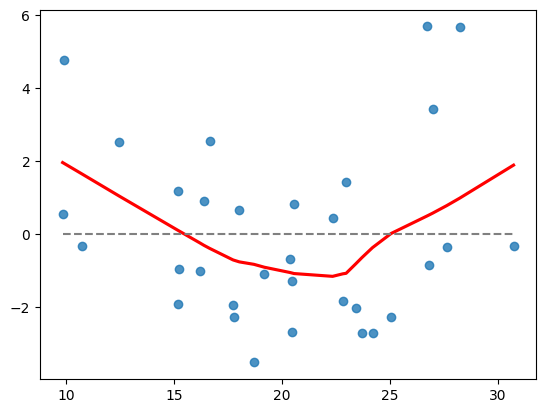

In [11]:
fig = plt.figure() 
sns.regplot(x = y_pred, y = residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
# 2차함수와 같은 분포를 보여서 정규성이 없을것으로 보임

In [12]:
## 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다.
# Q-Q Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 Q-Q Plot에서 점들이 점선을 따라 배치되어 있어야 한다.

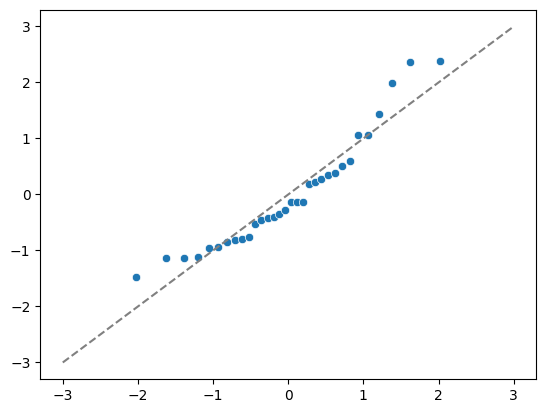

In [13]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x = x, y = y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

# 대각선을 벗어난 점들이 많이 보이므로 정규성이 없어 보임

In [14]:
# 잔차의 정규성은 샤피로 검정으로 확인할 수 있다.
import scipy.stats as stats
stats.shapiro(residual) # ShapiroResult(statistic=0.9450905919075012, pvalue=0.02152460627257824)
# 위 분석에서 두 번째 값이 p값이다. pvalue=0.0168 이므로 유의수준 5%에서 잔차의 정규성이 위반되었다고 판단한다.

ShapiroResult(statistic=0.9166126847267151, pvalue=0.01684393174946308)

In [ ]:
## 잔차의 등분산성
# 회귀모형을 통햬 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 아래 그래프는 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것이다.

<AxesSubplot:>

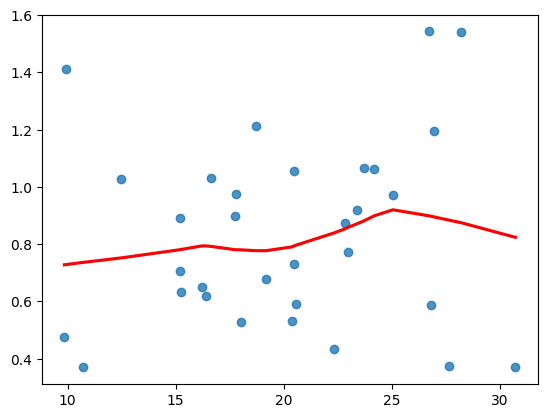

In [17]:
import numpy as np
sns.regplot(x = fitted, y = np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
# 빨간색은 수평이며, 동그라미는 무작위여야함.
# 대체적으로 그러한 분포를 가지므로 잔차는 등분산성을 보임

In [ ]:
## 잔차의 독립성
# Result.summary의 Durbin-Watson(더빈왓슨, DW검정)으로 확인한다.
# DW검정은 잔차의 독립성을 확인할 수 있는 수치이다. 0이면 잔차들이 양의 자기상관을 갖고, 2이면 자기상관이 없는 독립성을 갖고, 4이면 잔차들이 음의 자기상관을 갖는다고 해석한다.
# 보통 1.5 ~ 2.5사이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미한다. DW검정값이 0 또는 4에 가깝다는 것은 잔차들이 자기상관을 가지고 있다는 의미이고, 이는 t값, F값, R제곱을 실제보다 증가시켜 실제로 유의미하지 않은 결과를 유의미한 결과로 왜곡하게 된다.
# 위 회귀분석에서 더빈왓슨검정의 값이 1.736이므로 독립성이 있다고 판단할 수 있다.

In [18]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.70e-10
Time:                        08:11:40   Log-Likelihood:                -73.292
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      27   BIC:                             163.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1487      6.294      4.631      0.000      16.235      42.062
hp            -0.0348      0.012     -2.999      0.006      -0.059      -0.011
wt            -3.4797      1.078     -3.227      0.003      -5.692      -1.267
disp           0.0038      0.011      0.353      0.727      -0.018       0.026
drat           1.7680      1.320      1.340      0.192      -0.940       4.476
==============================================================================
Omnibus:                        5.267   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.327
Skew:                           0.899   Prob(JB):                        0.115
Kurtosis:                       3.102   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## 극단값
# Cook's distance는 극단값을 나타내는 지표이다.
# 48번, 22번, 38번 자료가 특히 예측에서 많이 벗어남을 알 수 있다. (예측에서 많이 벗어남 = 영향력이 크다)
# 0.5 or 1 보다 크면 예측에서 많이 벗어나다고 할 수 있음

In [21]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(lr).cooks_distance
cd.sort_values(ascending=False).head()

30    0.394064
16    0.271338
19    0.122137
27    0.118109
28    0.099296
dtype: float64

In [ ]:
# ㅁ 다중공선성
#  - 독립변수간의 강한 선형관계
#  - 다중공선성이 존재할 경우 나타날 수 있는 현상
#   . 분산분석의 F값에 의해 회귀식의 전반적인 유의성이 확인되더라도 t값에 의한 개별 회귀계수에 대한 유의성이 나타나지 않음
#   . 회귀계수가 상식에 반하는 부호를 가짐
#  - 다중공선성은 분산팽창지수로 측정
#   . VIF가 4를 넘으면 다중공선성이 존재하는지 점검할 필요가 있으며 10을 초과하면 다중공선성이 존재할 가능성이 높다고 판단

In [23]:
lr.summary()
# Cond. No.와 [2] The condition number is large, 4.26e+03. This might indicate that there are strong multicollinearity or other numerical problems.
# 로 다중공산성 여부를 확인할 수 있다. 다중공산성이 존재하는것으로 추정되어 세부적인 확인이 필요함

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.70e-10
Time:                        08:30:15   Log-Likelihood:                -73.292
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      27   BIC:                             163.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1487      6.294      4.631      0.000      16.235      42.062
hp            -0.0348      0.012     -2.999      0.006      -0.059      -0.011
wt            -3.4797      1.078     -3.227      0.003      -5.692      -1.267
disp           0.0038      0.011      0.353      0.727      -0.018       0.026
drat           1.7680      1.320      1.340      0.192      -0.940       4.476
==============================================================================
Omnibus:                        5.267   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.327
Skew:                           0.899   Prob(JB):                        0.115
Kurtosis:                       3.102   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# 2. VIF(Variance Inflation Factors, 분산팽창요인)
# 보통 VIF가 10이 넘으면 다중공선성이 있다고 판단한다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfx.values, i) for i in range(dfx.shape[1])]
vif["features"] = dfx.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif
# 모든 변수의 VIF가 10을 넘는 것을 확인할 수 있다.

,VIF Factor,features
0,11.895321,drat
1,16.403205,hp
2,37.115477,disp
3,47.530410,wt


In [ ]:
## ㅁ 다중공선성 해결방법
# 1. 정규화(regularized) 방법 사용
# 2. 의존적인 변수를 삭제(변수선택법 등 활용)
# 3. PCA(principal component analysis) 방법으로 의존적인 성분 삭제

In [ ]:
# 1. 정규화(regularized) 방법 사용
# 회귀분석에서 정규화가 필요한 이유 중 하나이다.
# 독립변수들읠 정규화 한 이후 회귀분석을 실시한 후 VIF를 확인해보겠다.
# 분류보다는 회귀분석에서 유용하다.
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(dfx)
dfx_sc = MmScaler.transform(dfx)

In [58]:
df02 = pd.concat([pd.DataFrame(dfx_sc), dfy], axis = 1, ignore_index=True)
df02.columns = ['hp',	'wt',	'disp',	'drat', 'mpg']
lr_sc = ols('mpg ~ hp + wt + disp + drat', data = df02).fit()
lr_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.70e-10
Time:                        08:45:21   Log-Likelihood:                -73.292
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      27   BIC:                             163.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.2263      2.099     12.970      0.000      22.919      31.533
hp            -9.8437      3.282     -2.999      0.006     -16.578      -3.110
wt           -13.6090      4.218     -3.227      0.003     -22.263      -4.955
disp           1.5295      4.332      0.353      0.727      -7.358      10.417
drat           3.8367      2.864      1.340      0.192      -2.040       9.713
==============================================================================
Omnibus:                        5.267   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.327
Skew:                           0.899   Prob(JB):                        0.115
Kurtosis:                       3.102   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
xdf02_sc = pd.DataFrame(dfx_sc)
xdf02_sc.columns = ['hp',	'wt',	'disp',	'drat']

In [64]:
# 2. VIF(Variance Inflation Factors, 분산팽창요인)
# 보통 VIF가 10이 넘으면 다중공선성이 있다고 판단한다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(xdf02_sc.values, i) for i in range(xdf02_sc.shape[1])]
vif["features"] = xdf02_sc.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif
# drat, hp 변수의 VIF가 10이하로 감소함

,VIF Factor,features
0,1.978751,drat
1,8.585632,hp
2,15.813706,wt
3,22.087774,disp


In [34]:
# ㅁ 회귀모델 수정
#  - 관측값 제거, 변수 변환, 변수 추가/제거를 통해 회귀모델 수정
#  - 이상점/영향점 > 관측값 제거
#  - 선형성, 정규성, 등분산성 가정 미충족 > 변수 변환(정규화, Min-Max 등)
#   . 선형성의 가정을 위배하면 독립변수를 변환
#   . 정규성/등분산의 가정을 위배하면 종속변수를 변환
#  - 다중공선성 > 변수 제거